Dominos - Predictive Purchase Order System

In [1]:
# Import Libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load pizza sales and ingredients data

In [2]:
df_pizza = pd.read_csv('D:\GUVI_AI & ML\Capstone5\Pizza_Sale - pizza_sales.csv')

In [3]:
df_ingred = pd.read_csv('D:\GUVI_AI & ML\Capstone5\Pizza_ingredients - Pizza_ingredients.csv')

PIZZA SALES DATA ANALYSIS

In [4]:
df_pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df_pizza.shape

(48620, 12)

In [6]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [7]:
df_pizza.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48613.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821494
std,14035.529381,6180.119770,0.143077,3.621789,4.437520
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


Handling missing values  (Pizza sales data)

In [8]:
df_pizza.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

FILLING total_price null values based on values of unit_price and quantity

In [9]:
# Check for missing values in unit_price and quantity
print(df_pizza[['unit_price', 'quantity']].isnull().sum())


unit_price    0
quantity      0
dtype: int64


In [10]:
# Fill total_price based on unit_price and quantity (since unit price and quantity dont have null values)
df_pizza['total_price'] = df_pizza['total_price'].fillna(
    df_pizza['unit_price'] * df_pizza['quantity'])

In [11]:
df_pizza.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

Filling Missing Pizza Categories Based on Pizza Name ID:
Mapping Pizza Name ID to Fill missing values of Pizza Category

In [12]:
category_mapping = df_pizza[['pizza_name_id', 'pizza_category']].dropna().drop_duplicates()
category_mapping = category_mapping.set_index('pizza_name_id')['pizza_category'].to_dict()

df_pizza['pizza_category'] = df_pizza['pizza_category'].fillna(df_pizza['pizza_name_id'].map(category_mapping))

In [13]:
df_pizza.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients    13
pizza_name            7
dtype: int64

Filling Missing Pizza Ingredients Based on Pizza Name:
Mapping Pizza Name to Fill Pizza Ingredients

In [14]:
ingredients_mapping = df_pizza[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ingredients_mapping = ingredients_mapping.set_index('pizza_name')['pizza_ingredients'].to_dict()

df_pizza['pizza_ingredients'] = df_pizza['pizza_ingredients'].fillna(df_pizza['pizza_name'].map(ingredients_mapping))

In [15]:
df_pizza.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            7
dtype: int64

Filling Missing Pizza Name Based on Pizza Ingredients:
Mapping Pizza Ingredients to Fill Pizza Name

In [16]:
ingredients_name_mapping = df_pizza[['pizza_ingredients', 'pizza_name']].dropna().drop_duplicates()
ingredients_name_mapping = ingredients_name_mapping.set_index('pizza_ingredients')['pizza_name'].to_dict()

df_pizza['pizza_name'] = df_pizza['pizza_name'].fillna(df_pizza['pizza_ingredients'].map(ingredients_name_mapping))

In [17]:
df_pizza.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
dtype: int64

Filling Missing Pizza Name ID Based on Pizza Name:
Mapping Pizza Name to Fill Pizza Name ID

In [18]:
name_id_mapping = df_pizza[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_mapping = name_id_mapping.set_index('pizza_name')['pizza_name_id'].to_dict()

df_pizza['pizza_name_id'] = df_pizza['pizza_name_id'].fillna(df_pizza['pizza_name'].map(name_id_mapping))

In [19]:
df_pizza.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

Handling null values (Pizza ingredients)

In [20]:
df_ingred.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [21]:
df_ingred.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [22]:
# Display rows where Items_Qty_In_Grams is NaN
missing_qty_rows = df_ingred[df_ingred['Items_Qty_In_Grams'].isna()]
print(missing_qty_rows)

    pizza_name_id            pizza_name   pizza_ingredients  \
24   brie_carre_s  The Brie Carre Pizza  Caramelized Onions   
149    hawaiian_l    The Hawaiian Pizza          Sliced Ham   
152    hawaiian_m    The Hawaiian Pizza          Sliced Ham   
155    hawaiian_s    The Hawaiian Pizza          Sliced Ham   

     Items_Qty_In_Grams  
24                  NaN  
149                 NaN  
152                 NaN  
155                 NaN  


Calculating the Mean for each Pizza Name ID:

In [23]:
mean_qty = df_ingred.groupby('pizza_name_id')['Items_Qty_In_Grams'].mean()

Filling missing Items Quantity values using the Mean value:

In [24]:
df_ingred['Items_Qty_In_Grams'] = df_ingred['Items_Qty_In_Grams'].fillna(df_ingred['pizza_name_id'].map(mean_qty))

In [25]:
df_ingred.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64

Merging Sales and Ingredients DataFrames

In [26]:
merged_data = pd.merge(df_pizza, df_ingred, on = 'pizza_name_id', how = 'left')

In [27]:
merged_data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_x,pizza_name_x,pizza_name_y,pizza_ingredients_y,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Sliced Ham,25.0
1,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Pineapple,30.0
2,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,The Hawaiian Pizza,Mozzarella Cheese,20.0
3,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Pepperoni,40.0
4,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,The Classic Deluxe Pizza,Mushrooms,40.0


In [28]:
merged_data.shape

(267576, 15)

In [29]:
merged_data.isnull().sum()

pizza_id               0
order_id               0
pizza_name_id          0
quantity               0
order_date             0
order_time             0
unit_price             0
total_price            0
pizza_size             0
pizza_category         0
pizza_ingredients_x    0
pizza_name_x           0
pizza_name_y           0
pizza_ingredients_y    0
Items_Qty_In_Grams     0
dtype: int64

In [30]:
merged_data[['pizza_ingredients_x', 'pizza_ingredients_y']]

,pizza_ingredients_x,pizza_ingredients_y
0,"Sliced Ham, Pineapple, Mozzarella Cheese",Sliced Ham
1,"Sliced Ham, Pineapple, Mozzarella Cheese",Pineapple
2,"Sliced Ham, Pineapple, Mozzarella Cheese",Mozzarella Cheese
3,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Pepperoni
4,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Mushrooms
...,...,...
267571,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Peppers
267572,"Barbecued Chicken, Red Peppers, Green Peppers,...",Green Peppers
267573,"Barbecued Chicken, Red Peppers, Green Peppers,...",Tomatoes
267574,"Barbecued Chicken, Red Peppers, Green Peppers,...",Red Onions


In [31]:
merged_data[['pizza_name_x', 'pizza_name_y']]

,pizza_name_x,pizza_name_y
0,The Hawaiian Pizza,The Hawaiian Pizza
1,The Hawaiian Pizza,The Hawaiian Pizza
2,The Hawaiian Pizza,The Hawaiian Pizza
3,The Classic Deluxe Pizza,The Classic Deluxe Pizza
4,The Classic Deluxe Pizza,The Classic Deluxe Pizza
...,...,...
267571,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267572,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267573,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza
267574,The Barbecue Chicken Pizza,The Barbecue Chicken Pizza


In [32]:
merged_data.drop(columns = ['pizza_ingredients_y', 'pizza_name_y'], inplace = True)
merged_data.rename(columns = {'pizza_name_x': 'pizza_name', 'pizza_ingredients_x': 'pizza_ingredients'}, inplace = True)

In [33]:
merged_data.shape

(267576, 13)

In [34]:
merged_data.isna().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
Items_Qty_In_Grams    0
dtype: int64

In [35]:
merged_data.duplicated().sum()

np.int64(80204)

In [36]:
# Droping duplicate rows from the dataset
merged_data = merged_data.drop_duplicates()

print(f"Number of rows after removing duplicates: {merged_data.shape[0]}")

Number of rows after removing duplicates: 187372


In [37]:
merged_data1 = merged_data.copy()

In [38]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187372 entries, 0 to 267573
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            187372 non-null  int64  
 1   order_id            187372 non-null  int64  
 2   pizza_name_id       187372 non-null  object 
 3   quantity            187372 non-null  int64  
 4   order_date          187372 non-null  object 
 5   order_time          187372 non-null  object 
 6   unit_price          187372 non-null  float64
 7   total_price         187372 non-null  float64
 8   pizza_size          187372 non-null  object 
 9   pizza_category      187372 non-null  object 
 10  pizza_ingredients   187372 non-null  object 
 11  pizza_name          187372 non-null  object 
 12  Items_Qty_In_Grams  187372 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 20.0+ MB


In [39]:
merged_data.describe()

,pizza_id,order_id,quantity,unit_price,total_price,Items_Qty_In_Grams
count,187372.000000,187372.000000,187372.000000,187372.000000,187372.000000,187372.000000
mean,24312.676030,10702.312405,1.019250,16.914338,17.244843,37.645900
std,14039.560378,6181.841091,0.141575,3.571451,4.419979,35.729459
min,1.000000,1.000000,1.000000,9.750000,9.750000,5.000000
25%,12166.750000,5344.000000,1.000000,12.750000,12.750000,15.000000
50%,24266.000000,10661.000000,1.000000,16.750000,16.750000,20.000000
75%,36494.250000,16112.250000,1.000000,20.500000,20.750000,45.000000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000,200.000000


Covert order date into date-time format

In [40]:
merged_data.shape

(187372, 13)

In [41]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

In [42]:
merged_data['order_date'] = merged_data['order_date'].apply(parse_dates)

In [43]:
merged_data.shape

(187372, 13)

In [44]:
# Display rows with NaT in the 'order_date' column
nat_dates = merged_data[merged_data['order_date'].isna()]
print(nat_dates)

Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, Items_Qty_In_Grams]
Index: []


In [45]:
merged_data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,25.0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0


Check and remove Outliers in Quantity and Total price

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

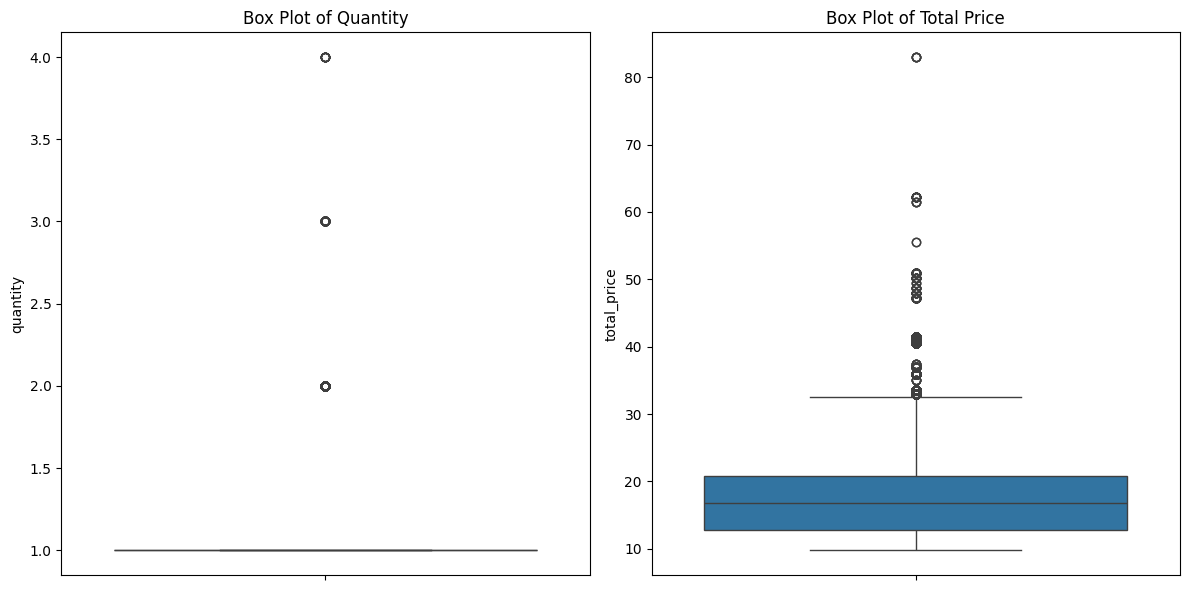

In [47]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

 # Box plot for 'quantity'
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_data, y='quantity')
plt.title('Box Plot of Quantity')

# Box plot for 'total_price'
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, y='total_price')
plt.title('Box Plot of Total Price')

plt.tight_layout()
plt.show()

In [48]:
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return the DataFrame without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [49]:
# Apply the function to remove outliers in 'quantity' and 'total_price'
removed_outliers = remove_outliers_iqr(merged_data, 'quantity')
removed_outliers = remove_outliers_iqr(merged_data, 'total_price')

In [50]:
# Find outliers removed from the 'quantity' column
outliers_quantity = merged_data.merge(removed_outliers, on=list(merged_data.columns), how='left', indicator=True)
outliers_quantity = outliers_quantity[outliers_quantity['_merge'] == 'left_only'][['quantity']]

In [51]:
# Find outliers removed from the 'total_price' column
outliers_total_price = merged_data.merge(removed_outliers, on=list(merged_data.columns), how='left', indicator=True)
outliers_total_price = outliers_total_price[outliers_total_price['_merge'] == 'left_only'][['total_price']]

In [52]:
# Display the outliers
print("Outliers in 'quantity':")
print(outliers_quantity)

print("Outliers in 'total_price':")
print(outliers_total_price)

Outliers in 'quantity':
        quantity
699            3
700            3
701            3
702            3
703            3
...          ...
187294         2
187295         2
187296         2
187297         2
187298         2

[2495 rows x 1 columns]
Outliers in 'total_price':
        total_price
699           62.25
700           62.25
701           62.25
702           62.25
703           62.25
...             ...
187294        41.50
187295        41.50
187296        41.50
187297        41.50
187298        41.50

[2495 rows x 1 columns]


In [53]:
# Update merged_data by keeping only the rows in merged_data_no_outliers
merged_data = removed_outliers.copy()

# Verify the update
print("Updated merged_data shape:", merged_data.shape)

Updated merged_data shape: (184877, 13)


In [54]:
merged_data.shape

(184877, 13)

EDA AND FEATURE ENGINEERING

ANALYSIS: SALES OVER TIME  (PLOTTING)

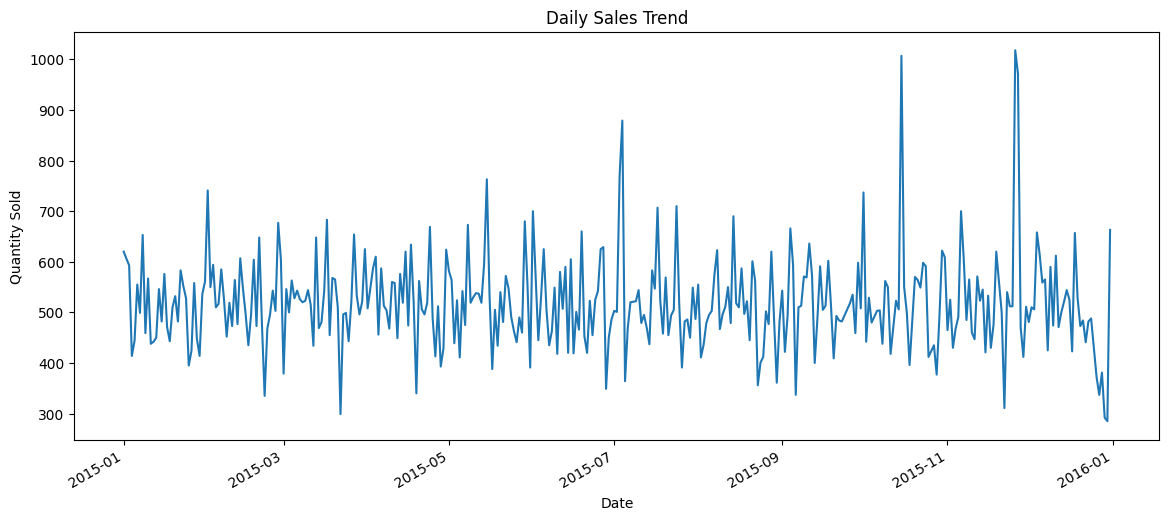

In [55]:
# # Ploting sales quantity over time

# Group by order date to find daily trends
daily_sales = merged_data.groupby('order_date')['quantity'].sum()
daily_sales.plot(figsize=(14, 6), title='Daily Sales Trend', xlabel='Date', ylabel='Quantity Sold')
plt.show()

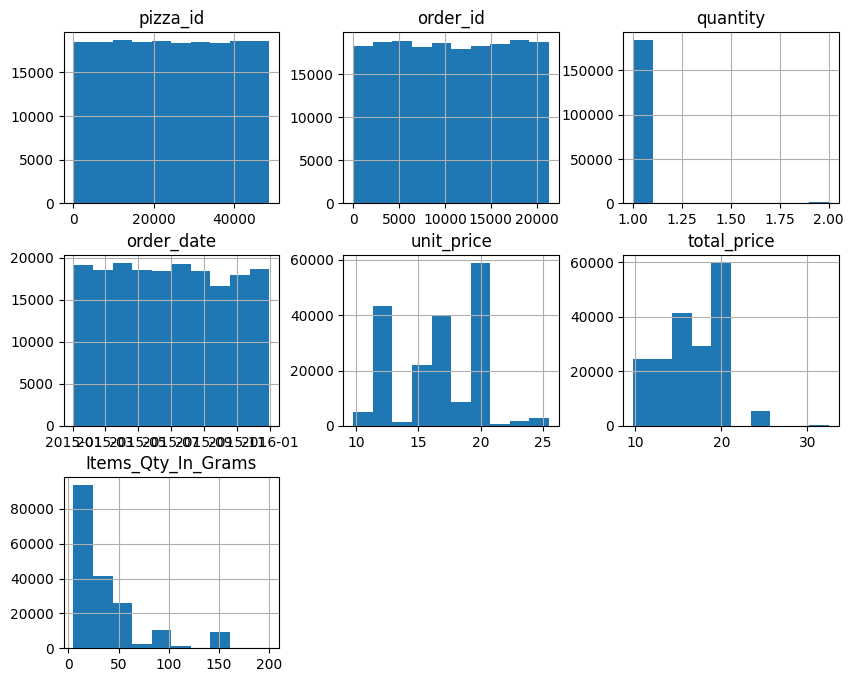

In [56]:
merged_data.hist(figsize=(10,8))
plt.show()

MONTHLY SALES PATTERN  (PLOTTING)

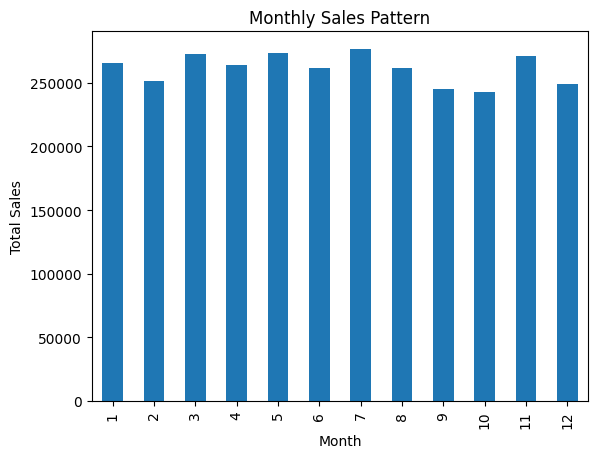

In [57]:
merged_data['month'] = merged_data['order_date'].dt.month
monthly_sales = merged_data.groupby('month')['total_price'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales Pattern', xlabel='Month', ylabel='Total Sales')
plt.show()

SALES BY WEEKLY PATTERN  (PLOTTING)

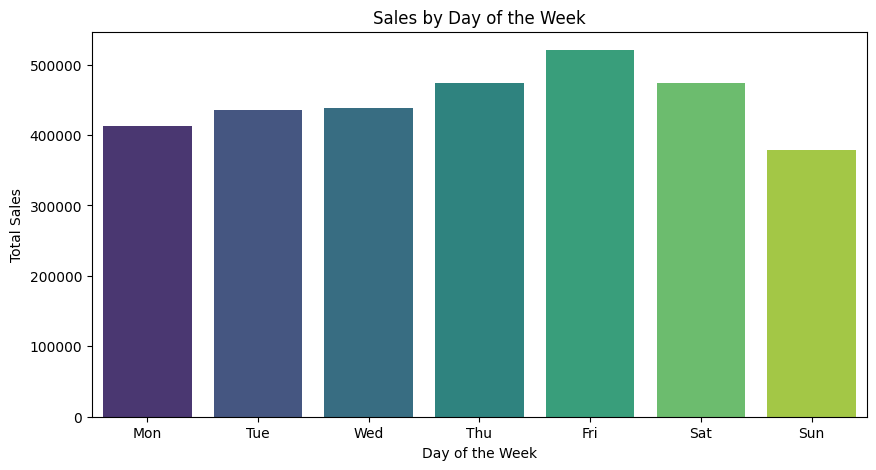

In [58]:
# create a day_of_week column from the order_date column

# Extract the day of the week as integer (0=Monday, 6=Sunday)
merged_data['day_of_week'] = merged_data['order_date'].dt.dayofweek

# Aggregate sales by day of the week
sales_by_day = merged_data.groupby('day_of_week')['total_price'].sum().reset_index()

# Define order for the days of the week
days_order = [0, 1, 2, 3, 4, 5, 6]
sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)

# Plot sales by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_by_day, x='day_of_week', y='total_price', palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

TOP SALES OF PIZZA (PIZZA NAME AND QUANTITY)  PLOTTING

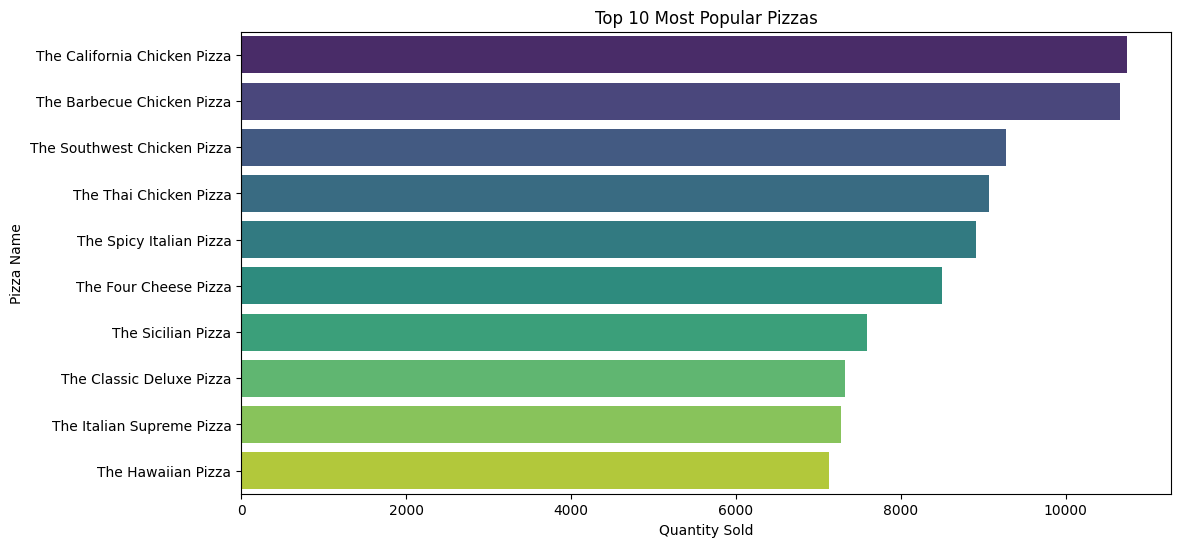

In [59]:
# Aggregate sales by pizza name
pizza_sales = merged_data.groupby('pizza_name')['quantity'].sum().reset_index()

# Sorting by quantity sold
pizza_sales = pizza_sales.sort_values(by='quantity', ascending=False)

# Ploting top 10 most popular pizzas
plt.figure(figsize=(12,6))
sns.barplot(data=pizza_sales.head(10), x='quantity', y='pizza_name', palette='viridis')
plt.title('Top 10 Most Popular Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

SLAES PIZZA BY SIZE AND QUANTITY (PLOTTING)

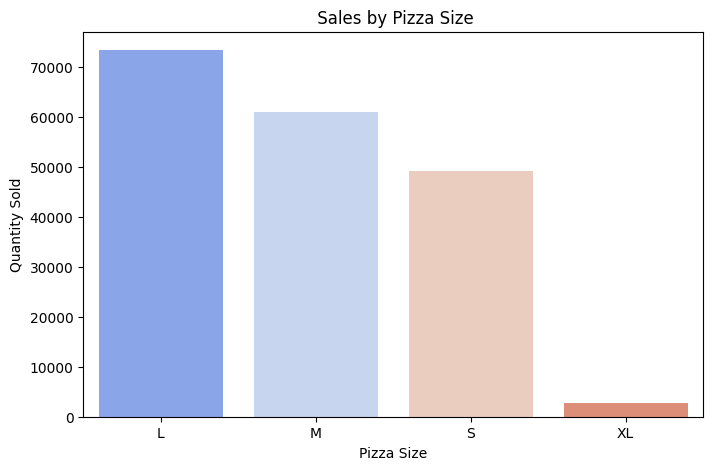

In [60]:
size_sales = merged_data.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize = (8, 5))
sns.barplot(data = size_sales, x = 'pizza_size', y = 'quantity', palette = 'coolwarm')
plt.title(' Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Quantity Sold')
plt.show()

SALES PIZZA BY CATEGORY AND QUANTITY

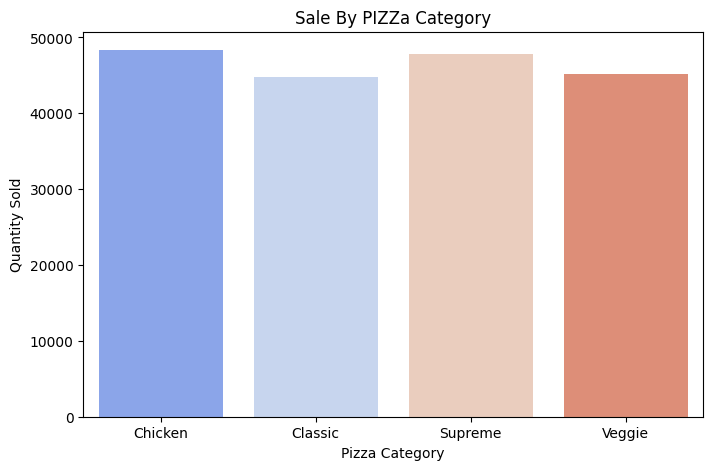

In [61]:
category_sales = merged_data.groupby('pizza_category')['quantity'].sum().reset_index()

plt.figure(figsize = (8, 5))
sns.barplot(data = category_sales, x = 'pizza_category', y = 'quantity', palette = 'coolwarm')
plt.title('Sale By PIZZa Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.show()

ADDING HOLIDAY INDICATOR TO THE DATA

In [ ]:
! pip install holidays

In [62]:
import holidays
from datetime import datetime

# Generate holidays for a specific country (e.g., United States for 2015)
us_holidays = holidays.US()  # Change to other years if needed

# Creating a 'holiday' column that indicates if the order_date was a holiday
merged_data['holiday'] = merged_data['order_date'].apply(lambda x: 1 if x in us_holidays else 0)

# Checking if the holiday flag works
merged_data[['order_date', 'holiday']].head()

,order_date,holiday
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
6,2015-01-01,1


In [63]:
merged_data[['order_date', 'holiday']].tail()

,order_date,holiday
267565,2015-12-31,0
267567,2015-12-31,0
267570,2015-12-31,0
267571,2015-12-31,0
267573,2015-12-31,0


Adding Weekend Promotion Flag(assuming promotions happen on weekends)

In [64]:
# Creating a 'promotional_period' flag for weekends 
merged_data['promotion'] = merged_data['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Checking if the promotion flag works
merged_data[['order_date', 'promotion']].head()

,order_date,promotion
0,2015-01-01,0
1,2015-01-01,0
2,2015-01-01,0
3,2015-01-01,0
6,2015-01-01,0


In [65]:
merged_data[merged_data['promotion'] == 1][['order_date', 'promotion']].head()

,order_date,promotion
1789,2015-01-03,1
1790,2015-01-03,1
1791,2015-01-03,1
1793,2015-01-03,1
1794,2015-01-03,1


ADDING YEAR AND WEEK COLUMNS TO THE DATASET

In [66]:
# Extracting the year
merged_data['year'] = merged_data['order_date'].dt.year

# Createing a new column for the week number
merged_data['week'] = merged_data['order_date'].dt.isocalendar().week

In [67]:
merged_data.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
Items_Qty_In_Grams    0
month                 0
day_of_week           0
holiday               0
promotion             0
year                  0
week                  0
dtype: int64

In [68]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184877 entries, 0 to 267573
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pizza_id            184877 non-null  int64         
 1   order_id            184877 non-null  int64         
 2   pizza_name_id       184877 non-null  object        
 3   quantity            184877 non-null  int64         
 4   order_date          184877 non-null  datetime64[ns]
 5   order_time          184877 non-null  object        
 6   unit_price          184877 non-null  float64       
 7   total_price         184877 non-null  float64       
 8   pizza_size          184877 non-null  object        
 9   pizza_category      184877 non-null  object        
 10  pizza_ingredients   184877 non-null  object        
 11  pizza_name          184877 non-null  object        
 12  Items_Qty_In_Grams  184877 non-null  float64       
 13  month               184877 non-nul

In [69]:
merged_data.shape

(184877, 19)

SALES ANALYSIS HOLIDAYS Vs REGULAR DAYS

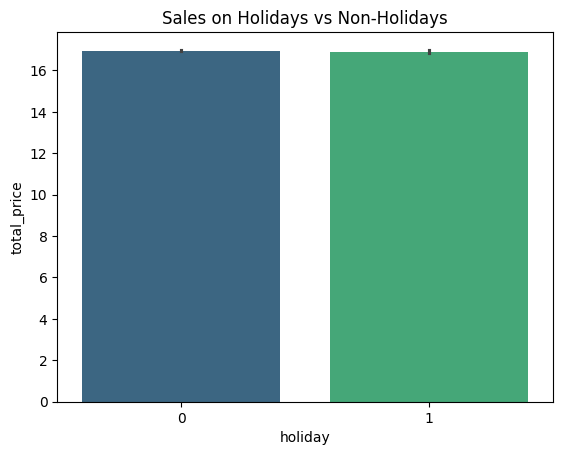

In [70]:
sns.barplot(x='holiday', y='total_price', data=merged_data, palette='viridis')
plt.title('Sales on Holidays vs Non-Holidays')
plt.show()

SALES DURING PROMOTIONS Vs NON-PROMOTIONS

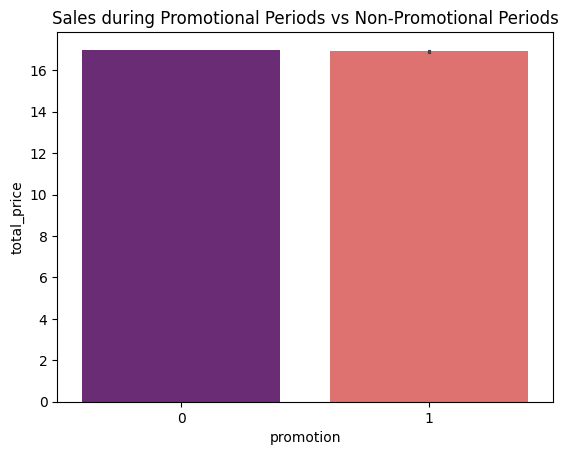

In [71]:
sns.barplot(x='promotion', y='total_price', data=merged_data, palette='magma')
plt.title('Sales during Promotional Periods vs Non-Promotional Periods')
plt.show()

MODELS SELECTION AND TRAINING

Install ARIMA AND SARIMA

In [109]:
pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 622.7 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/9.9 MB 658.7 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/9.9 MB 658.7 kB/s eta 0:00:14
   ---- ----------------------------------- 1.0/9.9 MB 729.5 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.9 MB 729.5 kB/s eta 0:00:13
   ----- ---------------------------------- 1.3/9.9 MB 684.9 kB/s eta 0:00:13
   ------ --------------------------------- 1.6/9.9 MB 723.4 kB/s eta 0:00:12
   ------- -------------------------------- 1.8/9.9 MB 792.8 kB/s eta 0:00:11
   --------- -----------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/614.7 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/614.7 kB ? eta -:--:--
   -------------------------------- ----- 524.3/614.7 kB 524.3 kB/s eta 0:00:01
   -------------------------------------- 614.7/614.7 kB 501.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? et


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
merged_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name',
       'Items_Qty_In_Grams', 'month', 'day_of_week', 'holiday', 'promotion',
       'year', 'week'],
      dtype='object')

ARIMA MODEL PREDICTIONS

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error as mape

In [74]:
# STEP1: Prepare Weekly Sales Data

def prepare_weekly_sales(df):
    # Convert order_date to datetime and group sales by week
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(merged_data)

# STEP2: Train-Test Split
# Use 80% of the data for training and 20% for testing
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]


In [75]:
# Display the train and test data to verify the split
print("Train data:")
print(train.tail())
print("\nTest data:")
print(test.tail())


Train data:
order_date
2015-09-14    3622
2015-09-21    2512
2015-09-28    3753
2015-10-05    2975
2015-10-12    3481
Name: quantity, dtype: int64

Test data:
order_date
2015-11-30    3840
2015-12-07    3637
2015-12-14    3672
2015-12-21    2605
2015-12-28    1621
Name: quantity, dtype: int64


In [76]:
# Step 3: Define MAPE Calculation
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

ARIMA IMPORTANT PARAMETERS NEEDS TUNING TO GET BEST MODEL
p (AutoRegressive term): The number of past observations (lags) used to predict the future value.
d (Differencing term): The number of times the data is differenced to make it stationary.
q (Moving Average term): The number of past forecast errors used to improve future predictions.

In [77]:
# Step 4: ARIMA Model Tuning
import itertools
def tune_arima_model(train, test, p_values, d_values, q_values):
    best_score, best_params, best_predictions = float("inf"), None, None

# Iterate over each combination of p, d, q to find the best ARIMA model
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            # Fit ARIMA model
            model = ARIMA(train, order=(p, d, q)).fit()
            # Make predictions on test data
            predictions = model.forecast(steps=len(test))
            # Calculate MAPE
            arima_mape = mape(test, predictions)
            # Update best model if MAPE is lower
            if arima_mape < best_score:
                best_score, best_params, best_predictions = arima_mape, (p, d, q), predictions
        except:
            continue

        print(f"Best ARIMA Model MAPE: {best_score:.4f}, Best Parameters: {best_params}")
    return best_predictions, best_score, best_params

In [78]:
# Step 5: Set Parameters and Tune ARIMA Model
p_values, d_values, q_values = range(0, 5), range(0, 2), range(0, 5)
arima_predictions, arima_mape_score, best_params = tune_arima_model(train, test, p_values, d_values, q_values)

# Step 6: Format and Display Predictions
arima_predictions = pd.Series(arima_predictions, index=test.index)
print("Predictions:")
print(arima_predictions)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.2033, Best Parameters: (0, 0, 0)
Best ARIMA Model MAPE: 0.2033, Best Parameters: (0, 0, 0)
Best ARIMA Model MAPE: 0.2008, Best Parameters: (0, 0, 2)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)
Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)
Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)
Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)
Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)
Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)
Best ARIMA Model MAPE: 0.1980, Best Parameters: (0, 0, 3)
Best ARIMA Model MAPE: 0.1955, Best Parameters: (1, 0, 2)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607:

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Model MAPE: 0.1932, Best Parameters: (1, 0, 3)
Predictions:
order_date
2015-10-19    3310.914027
2015-10-26    3436.377035
2015-11-02    3512.464718
2015-11-09    3528.520319
2015-11-16    3535.737056
2015-11-23    3538.980864
2015-11-30    3540.438905
2015-12-07    3541.094271
2015-12-14    3541.388847
2015-12-21    3541.521255
2015-12-28    3541.580770
Name: predicted_mean, dtype: float64


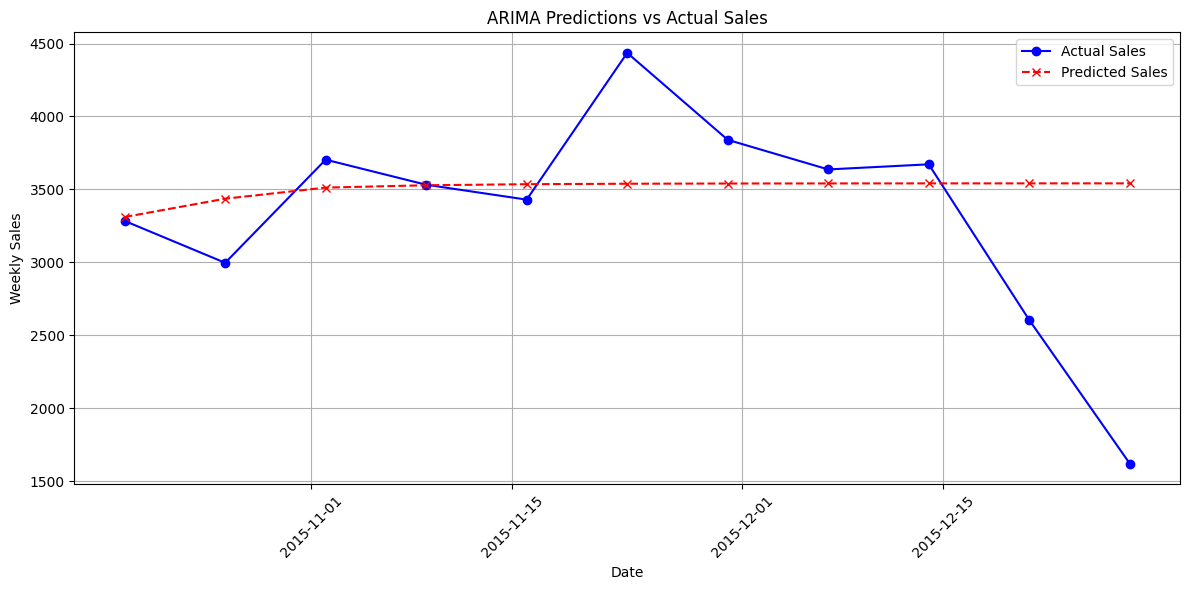

In [79]:
# Step 7: Plot Actual vs Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(arima_predictions.index, arima_predictions, label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('ARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

SARIMA MODEL PREDICTIONS (SEASONAL ANALYSIS)

P (Seasonal AutoRegressive term): The number of past seasonal values used for prediction.
D (Seasonal Differencing term): The number of seasonal differencing applied to make data stationary.
Q (Seasonal Moving Average term): The number of past seasonal forecast errors used for prediction.
S (Seasonal Period): The length of the seasonal cycle (e.g., 12 for yearly seasonality in monthly data).

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# STEP1: Pizza sales by week
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(merged_data)

In [82]:
# STEP2: rain test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

In [83]:
# STEP3: Evaluate MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

In [83]:
# STEP4: SARIMA MODEL TRAINING

def best_sarima_model(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
    predictions = model.forecast(steps=len(test))
    sarima_mape = mape(test, predictions)

    print(f"Best SARIMA Model MAPE: {sarima_mape:.4f}")
    return predictions, sarima_mape

In [84]:
# STEP5: Train, Evaluate the SARIMA model

sarima_predictions, sarima_mape_score = best_sarima_model(train, test)

sarima_predictions = pd.Series(sarima_predictions, index=test.index)

print("Predictions:")
print(sarima_predictions)

Best SARIMA Model MAPE: 0.1864
Predictions:
order_date
2015-10-19    3182.227558
2015-10-26    3535.994183
2015-11-02    3289.825803
2015-11-09    2625.358300
2015-11-16    3483.629115
2015-11-23    2958.137234
2015-11-30    3178.137305
2015-12-07    3060.079772
2015-12-14    3351.726126
2015-12-21    3131.844498
2015-12-28    2433.569239
Name: predicted_mean, dtype: float64


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


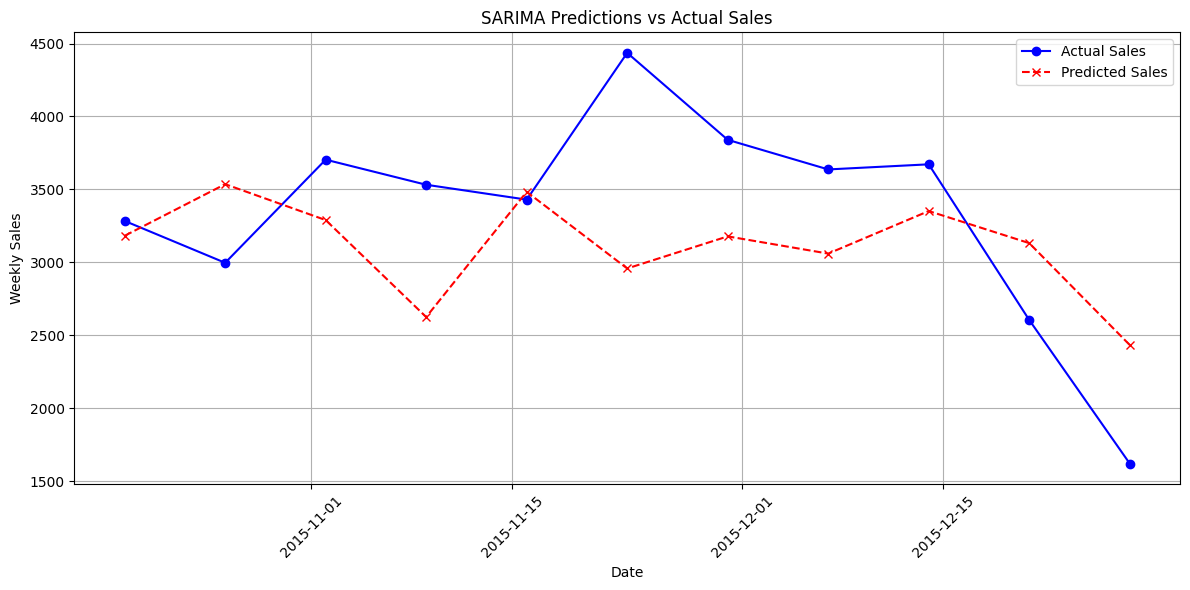

In [85]:
# STEP6: Plotting Actual vs Predicted Values

plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(sarima_predictions.index, sarima_predictions, label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('SARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

PROPHET MODEL PREDICTIONS

In [160]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.3 MB 2.8 MB/s eta 0:00:05
   ------ --------------------------------- 2.1/13.3 MB 2.8 MB/s eta 0:00:05
   -------- ------------------------------- 2.9/13.3 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 3.4/13.3 MB 2.9 MB/s eta 0:00:04
   ----------- ---------------------------- 3.9/13.3 MB 2.9 MB/s eta 0:00:04
   -------------- ------------------------- 4.7/13.3 MB 2.8 MB/s eta 0:00:04
   --------------- ------------------------ 5.2/13.3 MB 2.8 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/13.3 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.3 MB 2.7 MB/s eta 0:00:03
   -------------------- ------------------- 6.8/13.3 MB 2.7 MB/s eta 0:00:03
   ----------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [87]:
# STEP1: Prepare Data for Prophet
# Rename columns to match Prophet's expected format
df = merged_data.rename(columns={'order_date': 'ds', 'quantity': 'y'})  # Adssign variable name as ds (train_feature)and y (target))
df = df[['ds', 'y']]

In [88]:
# STEP2: Pizza sales by week
def prepare_weekly_sales_for_prophet(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    weekly_sales.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for the target variable
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales_for_prophet(merged_data)

In [89]:
# STEP3: train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]


In [90]:
# STEP4: Evaluate MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

In [91]:
# STEP5: Initialize and train the model
def best_prophet_model(train, test):
    # Initialize the Prophet model
    model = Prophet()
    
    # Fit the model on the training data
    model.fit(train)

    # Create a DataFrame with future dates for predictions
    future = model.make_future_dataframe(periods=len(test), freq='W')

    # Generate predictions for future dates
    forecast = model.predict(future)
    
    # Extract the predictions for the test period
    predictions = forecast['yhat'][-len(test):].values
    
    # Calculate MAPE
    prophet_mape = mape(test['y'].values, predictions)

    # Print MAPE
    print(f"Best Prophet Model MAPE: {prophet_mape:.4f}")
    
    # Return predictions and MAPE
    return predictions, prophet_mape

In [107]:
# Train and evaluate the Prophet model
prophet_predictions, prophet_mape_score = best_prophet_model(train, test)

# Formating the predictions for display
prophet_predictions = pd.Series(prophet_predictions, index=test['ds'])

print("Predictions:")
print(prophet_predictions)


11:00:34 - cmdstanpy - INFO - Chain [1] start processing
11:00:34 - cmdstanpy - INFO - Chain [1] done processing


Best Prophet Model MAPE: 0.2007
Predictions:
ds
2015-10-19    3522.082782
2015-10-26    3520.538119
2015-11-02    3518.993457
2015-11-09    3517.448794
2015-11-16    3515.904131
2015-11-23    3514.359469
2015-11-30    3512.814806
2015-12-07    3511.270143
2015-12-14    3509.725481
2015-12-21    3508.180818
2015-12-28    3506.636155
dtype: float64


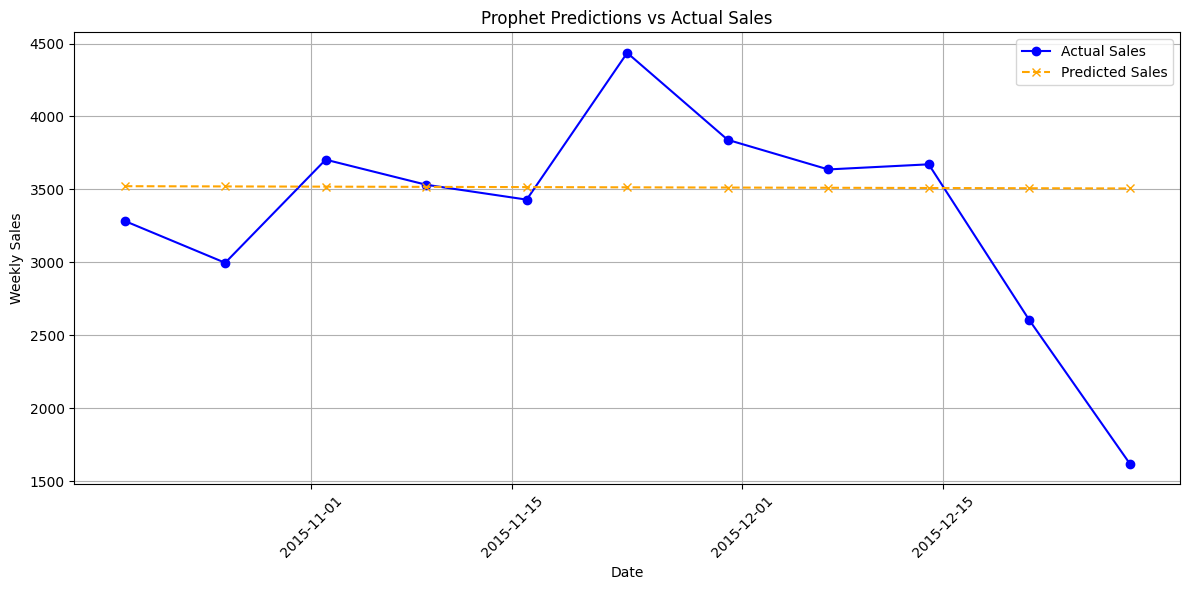

In [93]:
# STEP6:  Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual Sales', color='blue', marker='o')
plt.plot(prophet_predictions.index, prophet_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Prophet Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

REGRESSION MODEL PREDICTIONS

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [109]:
# STEP1: Aggregate Weekly Sales

def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

In [110]:
# STEP2: Feature engineering for Regression

def create_regression_features(df):
    df['week_of_year'] = df['order_date'].dt.isocalendar().week
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['month'] = df['order_date'].dt.month
    df['year'] = df['order_date'].dt.year
    return df

In [111]:
#STEP3: Prepare weekly sales and feature engineering

pizza_sales_weekly = prepare_weekly_sales(merged_data)
pizza_sales_weekly = create_regression_features(pizza_sales_weekly)

In [113]:
#STEP4: prepare data for Regression

X_train = train[['week_of_year', 'day_of_week', 'month', 'year']]
y_train = train['quantity']
X_test = test[['week_of_year', 'day_of_week', 'month', 'year']]
y_test = test['quantity']

In [112]:
#STEP4: Train and Test Split

train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

In [ ]:
# STEP5: Define Regression model and Evaluate

def best_regression_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    regression_mape = mape(y_test, predictions)
    
    print(f"Best Regression Model MAPE: {regression_mape:.4f}")
    return predictions, regression_mape

In [116]:
# STEP5: Evaluate the Regression predictions for best Regression model
regression_predictions, regression_mape_score = best_regression_model(X_train, y_train, X_test, y_test)

# Format predictions for display
regression_predictions = pd.Series(regression_predictions, index=test['order_date'])

print("Predictions:")
print(regression_predictions)

Best Regression Model MAPE: 0.1958
Predictions:
order_date
2015-10-19    3451.454193
2015-10-26    3438.002624
2015-11-02    3455.905575
2015-11-09    3442.454007
2015-11-16    3429.002439
2015-11-23    3415.550870
2015-11-30    3402.099302
2015-12-07    3420.002253
2015-12-14    3406.550684
2015-12-21    3393.099116
2015-12-28    3379.647548
dtype: float64


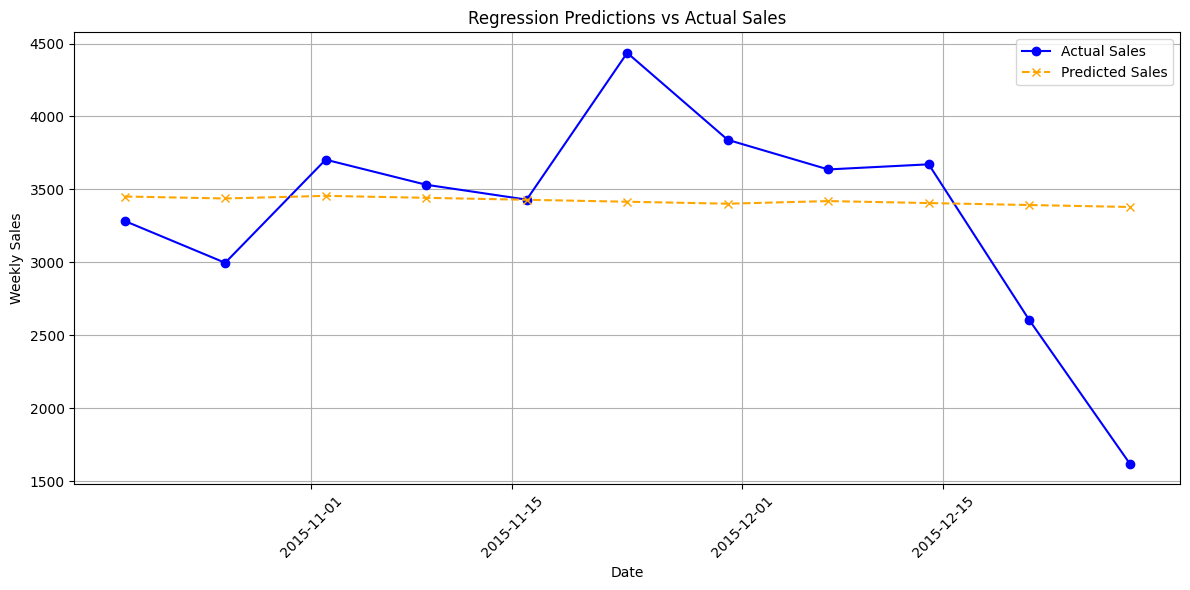

In [117]:
#STEP6: Plot actual vs predictions of Regression model

plt.figure(figsize=(12, 6))
plt.plot(test['order_date'], y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(regression_predictions.index, regression_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Regression Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

LSTM MODEL PREDICTIONS

In [103]:
pip install tensorflow

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.2 MB 3.4 MB/s eta 0:01:56
   ---------------------------------------- 1.3/390.2 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 2.1/390.2 MB 3.7 MB/s eta 0:01:46
   ---------------------------------------- 2.9/390.2 MB 3.5 MB/s eta 0:01:51
   ---------------------------------------- 3.4/390.2 MB 3.7 MB/s eta 0:01:46
   ---------------------------------------- 4.5/390.2 MB 3.7 MB/s eta 0:01:45
    --------------------------------------- 5.2/390.2 MB 3.7 MB/s eta 0:01:46
    --------------------------------------- 5.8/390.2 MB 3.6 MB/s eta 0:01:46
    --------------------------------------- 6.8/390.2 MB 3.7 MB/s eta 0:01:45
    --------------------------------------- 7.3/390.2 MB 3.7 MB/s eta 0:01:44
    --------------------------------------- 8.4/390.2 MB 3.7 MB/s eta 0:01:44
    --------------------------------------- 9.2/390.2 MB 3.7 MB/s eta 0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [119]:
# STEP1: Pizza sales by week

def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(merged_data)

In [120]:
# STEP2: rain test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

In [121]:
# STEP3: Normalizeing the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['quantity']])
test_scaled = scaler.transform(test[['quantity']])

In [122]:
# STEP4: Preparing data for LSTM
def create_lstm_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 3
X_train, y_train = create_lstm_dataset(train_scaled, time_steps)
X_test, y_test = create_lstm_dataset(test_scaled, time_steps)

In [123]:
# STEP5: Reshapeing X for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [124]:
# STEP6: TRAIN MODEL LSTM

def best_lstm_model(X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    lstm_mape = mape(y_test_rescaled, predictions)
    
    print(f"Best LSTM Model MAPE: {lstm_mape:.4f}")
    return predictions, lstm_mape, y_test_rescaled

In [125]:
# STEP7: train and evaluate LSTM model
lstm_predictions, lstm_mape_score, y_test_rescaled = best_lstm_model(X_train, y_train, X_test, y_test)

# Formatting the predictions for display
lstm_predictions = pd.Series(lstm_predictions.flatten(), index=test['order_date'][time_steps:])

print("Predictions:")
print(lstm_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Best LSTM Model MAPE: 0.2379
Predictions:
order_date
2015-11-09    3345.226318
2015-11-16    3395.412598
2015-11-23    3534.989746
2015-11-30    3637.863525
2015-12-07    3746.789062
2015-12-14    3873.464355
2015-12-21    3643.023926
2015-12-28    3405.651367
dtype: float32


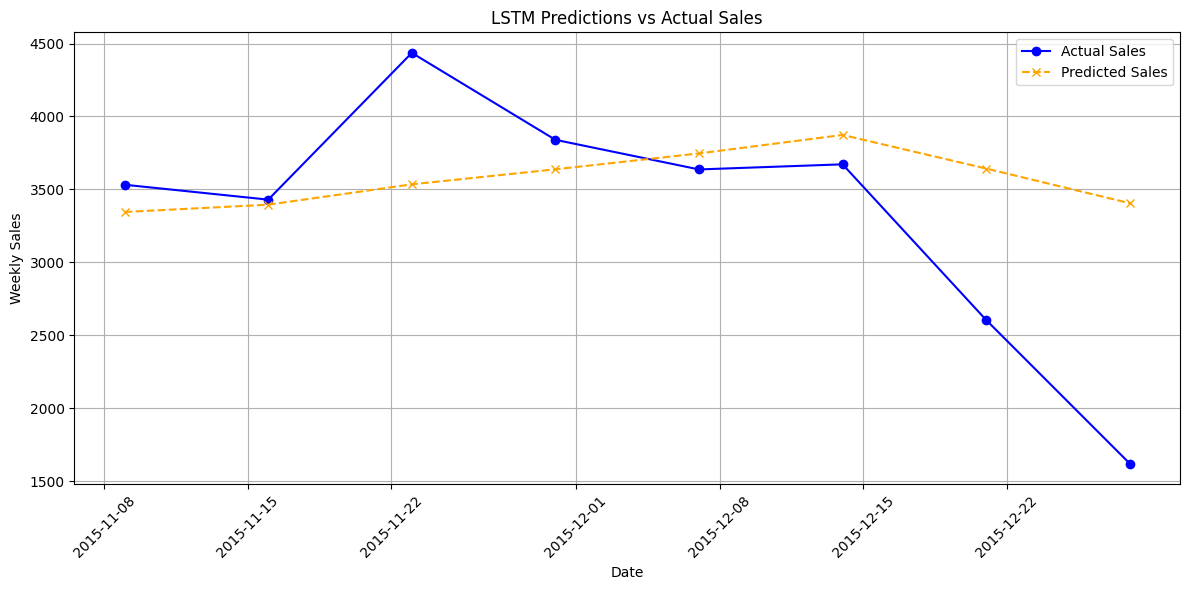

In [126]:
# STEP8: Plot the Actual Vs predicted values

plt.figure(figsize=(12, 6))
plt.plot(test['order_date'][time_steps:], y_test_rescaled, label='Actual Sales', color='blue', marker='o')
plt.plot(lstm_predictions.index, lstm_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('LSTM Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Performance comaprison of models

In [38]:
# Model results as a dictionary
model_performance = {
    'Model': ['SARIMA', 'ARIMA', 'Regression', 'Prophet', 'LSTM'],
    'MAPE': [0.1864, 0.1932, 0.1968, 0.2007, 0.2379]
}

# Createing a DataFrame
df_performance = pd.DataFrame(model_performance)

# Highlight best and worst models
df_performance['Rank'] = df_performance['MAPE'].rank()
df_performance = df_performance.sort_values('MAPE', ascending=True)
df_performance['Best/Worst'] = df_performance['MAPE'].apply(lambda x: 'Best' if x == df_performance['MAPE'].min() else 'Worst' if x == df_performance['MAPE'].max() else '')

# Display table
df_performance

,Model,MAPE,Rank,Best/Worst
0,SARIMA,0.1864,1.0,Best
1,ARIMA,0.1932,2.0,
2,Regression,0.1968,3.0,
3,Prophet,0.2007,4.0,
4,LSTM,0.2379,5.0,Worst


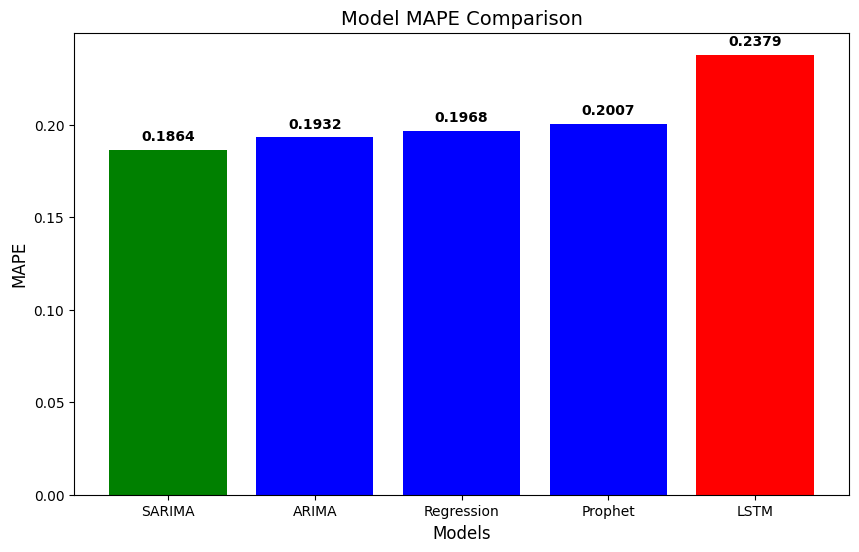

In [40]:
# Visualization of performance level of Models
import matplotlib.pyplot as plt
# Data for plotting
models = ['SARIMA', 'ARIMA', 'Regression', 'Prophet', 'LSTM']
mapes = [0.1864, 0.1932, 0.1968, 0.2007, 0.2379]

plt.figure(figsize=(10,6))
plt.bar(models, mapes, color=['green', 'blue', 'blue', 'blue', 'red'])

# Highlighting the best and worst models
plt.title('Model MAPE Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MAPE', fontsize=12)

for i, v in enumerate(mapes):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

SALES PREDICITONS(WEEK), Ingrdients estimation, and Purchase order creation
Apply with SARIMA model

In [1]:
# STEP1: Data preparation

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
pizza_df = pd.read_csv('D:\GUVI_AI & ML\Capstone5\Pizza_Sale - pizza_sales.csv')
ingred_df = pd.read_csv('D:\GUVI_AI & ML\Capstone5\Pizza_ingredients - Pizza_ingredients.csv')

In [2]:
pizza_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
pizza_df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [4]:
# Drop any rows with missing values in sales data
pizza_df.dropna(inplace=True)

In [5]:
pizza_df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48554 non-null  int64  
 1   order_id           48554 non-null  int64  
 2   pizza_name_id      48554 non-null  object 
 3   quantity           48554 non-null  int64  
 4   order_date         48554 non-null  object 
 5   order_time         48554 non-null  object 
 6   unit_price         48554 non-null  float64
 7   total_price        48554 non-null  float64
 8   pizza_size         48554 non-null  object 
 9   pizza_category     48554 non-null  object 
 10  pizza_ingredients  48554 non-null  object 
 11  pizza_name         48554 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [7]:
# Convert order_date to datetime format
def parse_dates(date):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    raise ValueError(f'No valid date format found for {date}')
pizza_df['order_date'] = pizza_df['order_date'].apply(parse_dates)

In [8]:
# Prepare data for weekly aggregation
pizza_df = pizza_df[['order_date', 'pizza_name', 'quantity']]
sales_summary = pizza_df.groupby(['order_date', 'pizza_name']).sum().reset_index()

# Pivot the data to have pizza names as columns
sales_pivot = sales_summary.pivot(index='order_date', columns='pizza_name', values='quantity').fillna(0)

In [9]:
sales_pivot.head()

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,8.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,11.0,2.0,7.0,4.0,9.0,5.0
2015-01-03,7.0,8.0,0.0,1.0,11.0,5.0,3.0,5.0,4.0,7.0,...,7.0,6.0,1.0,5.0,4.0,3.0,2.0,2.0,9.0,7.0
2015-01-04,9.0,0.0,2.0,2.0,5.0,4.0,1.0,4.0,2.0,4.0,...,4.0,3.0,0.0,1.0,4.0,3.0,4.0,3.0,5.0,1.0
2015-01-05,2.0,3.0,2.0,0.0,6.0,8.0,2.0,9.0,5.0,4.0,...,2.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,2.0


In [10]:
sales_summary.head()

,order_date,pizza_name,quantity
0,2015-01-01,The Barbecue Chicken Pizza,11
1,2015-01-01,The Big Meat Pizza,5
2,2015-01-01,The Calabrese Pizza,1
3,2015-01-01,The California Chicken Pizza,4
4,2015-01-01,The Chicken Alfredo Pizza,2


In [14]:
pizza_df.tail()

,order_date,pizza_name,quantity
48615,2015-12-31,The Chicken Alfredo Pizza,1
48616,2015-12-31,The Four Cheese Pizza,1
48617,2015-12-31,The Napolitana Pizza,1
48618,2015-12-31,The Mexicana Pizza,1
48619,2015-12-31,The Barbecue Chicken Pizza,1


In [12]:
# Applying SARIMA Model for Forecasting

# Initialize a dictionary to store SARIMA models for each pizza
arima_models = {}

# Fit the SARIMA model for each pizza type
for pizza_name in sales_pivot.columns:
    try:
        model = SARIMAX(sales_pivot[pizza_name], order=(1, 1, 0), seasonal_order=(1, 1, 0, 7))
        model_fit = model.fit(disp=False)
        arima_models[pizza_name] = model_fit
    except:
        print(f"ARIMA model for {pizza_name} failed to fit")

c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so

In [13]:
# Generate Sales Forecast for Next Week
# Using the trained SARIMA model, forecast pizza sales for the next week (7 days).

prediction_days = 7
predictions_arima = {}

# Generate forecast for the next 7 days for each pizza type
for pizza_name, model in arima_models.items():
    predictions_arima[pizza_name] = model.predict(start=len(sales_pivot), end=len(sales_pivot) + prediction_days - 1)

# Convert the predictions into a DataFrame
predictions_df = pd.DataFrame(predictions_arima)

# Assign dates for the forecasted period
predictions_df.index = pd.date_range(start=sales_pivot.index[-1], periods=prediction_days, freq='D')

c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

In [15]:
ingredients_df = ingred_df[['pizza_name', 'pizza_ingredients', 'Items_Qty_In_Grams']]

# change column name to items_qty
ingredients_df.rename(columns={'Items_Qty_In_Grams': 'items_qty'}, inplace=True)

C:\Users\Rajan\AppData\Local\Temp\ipykernel_15348\844605277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredients_df.rename(columns={'Items_Qty_In_Grams': 'items_qty'}, inplace=True)


In [17]:
predictions_df.head()

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2015-12-31,8.191724,3.170270,0.026562,2.183279,6.484677,2.472052,3.324679,6.699767,3.934018,7.467438,...,4.812704,0.543659,1.625759,4.550872,1.938680,4.596146,2.413206,3.175825,5.584964,7.275751
2016-01-01,7.637493,7.174803,0.898741,3.407204,6.509903,3.254784,4.021641,7.778999,3.690101,12.069625,...,5.615804,0.892116,2.753394,5.059960,5.340778,5.003287,4.010764,2.502544,8.481353,7.376767
2016-01-02,7.157267,4.160354,0.888408,1.922673,6.512057,1.355364,3.025799,7.009543,3.246174,10.187509,...,3.227154,2.384568,1.967297,3.356284,4.917820,5.409024,1.451068,2.157424,6.903677,10.120499
2016-01-03,10.327420,3.424005,0.215502,1.217192,6.491203,3.056952,4.750652,8.352917,2.043389,8.003764,...,5.921473,-0.976427,3.101485,3.303761,2.298176,3.511641,2.970213,4.321717,3.945248,7.228031
2016-01-04,8.753244,5.281855,0.526202,3.484513,6.481780,2.956293,1.655075,6.302142,2.439997,8.278337,...,3.831558,-0.183869,3.039522,4.547106,2.715560,4.808325,0.971379,1.742788,5.205122,5.158630


In [16]:
ingredients_df.head()

,pizza_name,pizza_ingredients,items_qty
0,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,The Barbecue Chicken Pizza,Red Peppers,15.0
2,The Barbecue Chicken Pizza,Green Peppers,20.0
3,The Barbecue Chicken Pizza,Tomatoes,30.0
4,The Barbecue Chicken Pizza,Red Onions,60.0


Calculating the quantities of ingredients required for the predicted pizza sales 

In [ ]:
# Step1: Create a dictionary to store ingredient quantities

ingredient_quantities = {}

# Iterate through each pizza in the predictions

for pizza_name in predictions_df.columns:

# Get the predicted quantity for the pizza

    predicted_quantity = predictions_df[pizza_name].sum()


In [33]:
# Get the ingredients for the pizza

for pizza_name in predictions_df.columns:
    predicted_quantity = predictions_df[pizza_name].sum()
    pizza_ingredients = ingredients_df[ingredients_df['pizza_name'] == pizza_name]
    
    for index, row in pizza_ingredients.iterrows():
        ingredient = row['pizza_ingredients']
        ingredient_qty = row['items_qty']
        required_quantity = predicted_quantity * ingredient_qty
        
        # Add to the dictionary
        if ingredient in ingredient_quantities:
            ingredient_quantities[ingredient] += required_quantity
        else:
            ingredient_quantities[ingredient] = required_quantity

In [34]:
# Create a DataFrame from the ingredient quantities

ingredient_requirements_df = pd.DataFrame.from_dict(ingredient_quantities, orient='index', columns=['required_quantity'])

# Print the ingredient requirements
ingredient_requirements_df

,required_quantity
Garlic,17052.502383
Barbecued Chicken,5557.414604
Red Peppers,11212.852146
Green Peppers,7568.122971
Tomatoes,30001.255172
...,...
Luganega Sausage,460.853504
Onions,230.426752
Soppressata Salami,5282.430534
Peperoncini verdi,872.707622


In [36]:

# Determine the last date in historical data
last_date = sales_pivot.index[-1]

# Generate date range for predictions
prediction_days = 7  # Number of days to predict
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=prediction_days, freq='D')

# Assign predicted dates to predictions DataFrame
predictions_df.index = predicted_dates

# Display the updated DataFrame with predictions and date range
print(predictions_df)

            The Barbecue Chicken Pizza  The Big Meat Pizza  \
2016-01-01                    8.191724            3.170270   
2016-01-02                    7.637493            7.174803   
2016-01-03                    7.157267            4.160354   
2016-01-04                   10.327420            3.424005   
2016-01-05                    8.753244            5.281855   
2016-01-06                    8.350097            4.877606   
2016-01-07                   11.331807            5.314571   

            The Brie Carre Pizza  The Calabrese Pizza  \
2016-01-01              0.026562             2.183279   
2016-01-02              0.898741             3.407204   
2016-01-03              0.888408             1.922673   
2016-01-04              0.215502             1.217192   
2016-01-05              0.526202             3.484513   
2016-01-06             -0.373381             1.545656   
2016-01-07              1.567477             2.209382   

            The California Chicken Pizza  The 

In [37]:
# Create a purchase order DataFrame
purchase_order_df = ingredient_requirements_df.copy()

# Add a column for the unit of measure (assuming all ingredients are in grams)
purchase_order_df['unit'] = 'grams'

# Rename the columns for better readability
purchase_order_df = purchase_order_df.rename(columns={'required_quantity': 'quantity'})

# Add a header to the purchase order
print('Purchase Order:')
print('----------------')

# Print the purchase order table
print(purchase_order_df.to_string())


Purchase Order:
----------------
                                quantity   unit
Garlic                      17052.502383  grams
Barbecued Chicken            5557.414604  grams
Red Peppers                 11212.852146  grams
Green Peppers                7568.122971  grams
Tomatoes                    30001.255172  grams
Red Onions                  44951.794307  grams
Barbecue Sauce               1852.471535  grams
Bacon                       18458.054798  grams
Pepperoni                   22404.331695  grams
Italian Sausage               334.034652  grams
Chorizo Sausage              1670.173262  grams
Brie Carre Cheese             112.485322  grams
Prosciutto                    112.485322  grams
Caramelized Onions                   NaN  grams
Pears                          37.495107  grams
Thyme                          18.747554  grams
?duja Salami                 1916.387893  grams
Pancetta                     2874.581839  grams
Friggitello Peppers           479.096973  grams
Chicken